Import all of the bridges and create the corresponding file list

In [5]:
from IEimport.IEimport import import_IE_from_excel
from IEimport.IEimport import generate_graph_from_json

excel_directory = "/Users/Julian/Documents/WorkDocuments/Irreducible Element/IE models/Excel/26-11-20/"
json_directory = "/Users/Julian/Documents/WorkDocuments/Irreducible Element/IE models/json/"

bridge_list = ['Castledawson_Deck_Bridge','Drumderg_Footbridge','Toome_Arch_Bridge','Baker_Bridge','Humber_Bridge','Randallstown_West_Deck_Bridge','Brough_Road_Footbridge','Bosphorous_Original','Bosphorous_Repaired']
file_list = []

for bridge in bridge_list:
    import_IE_from_excel(bridge, f"{excel_directory}{bridge}_IEM.xlsx")
    generate_graph_from_json(f"{json_directory}{bridge}.json")
    file_list.append(f"{json_directory}{bridge}.json")

Calculate the full distance matrix

In [ ]:
from comparison.backtracking import create_distance_matrix

similarity_matrix, nodes_in_mcs = create_distance_matrix(file_list, nodes_option=True)
print(nodes_in_mcs)
print(similarity_matrix)

Plot heatmap for the reduced set of bridges (Figure 1)

['Castledawson_Deck_Bridge', 'Drumderg_Footbridge', 'Toome_Arch_Bridge', 'Baker_Bridge', 'Humber_Bridge']
[[1.         0.05035971 0.07894737 0.0754717  0.00588235]
 [0.05035971 1.         0.05405405 0.05681818 0.00515464]
 [0.07894737 0.05405405 1.         0.18978102 0.00536673]
 [0.0754717  0.05681818 0.18978102 1.         0.01282051]
 [0.00588235 0.00515464 0.00536673 0.01282051 1.        ]]
                          Castledawson_Deck_Bridge  Drumderg_Footbridge  \
Castledawson_Deck_Bridge                      37.0                  7.0   
Drumderg_Footbridge                            7.0                109.0   
Toome_Arch_Bridge                              9.0                 10.0   
Baker_Bridge                                   8.0                 10.0   
Humber_Bridge                                  3.0                  3.0   

                          Toome_Arch_Bridge  Baker_Bridge  Humber_Bridge  
Castledawson_Deck_Bridge                9.0           8.0            3.0  
Dr

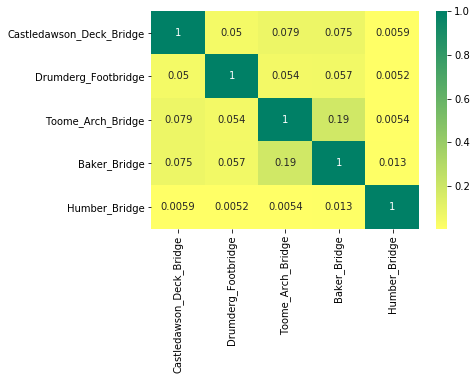

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np

# Bridges Randallstown [-2] and Brough_Road [-1] to be removed

fig1_bridge_list = bridge_list.copy()
del fig1_bridge_list[-1]
del fig1_bridge_list[-1]
del fig1_bridge_list[-1]
del fig1_bridge_list[-1]
print(fig1_bridge_list)

fig1_similarity_matrix = similarity_matrix.copy()
fig1_similarity_matrix = np.delete(fig1_similarity_matrix,[5, 6, 7, 8],0)
fig1_similarity_matrix = np.delete(fig1_similarity_matrix,[5, 6, 7, 8],1)

print(fig1_similarity_matrix)

df = pd.DataFrame(data=fig1_similarity_matrix, index=fig1_bridge_list, columns=fig1_bridge_list)
ax = sns.heatmap(df, annot=True, cmap="summer_r")

fig1_nodes_in_mcs = nodes_in_mcs.copy()
fig1_nodes_in_mcs = np.delete(fig1_nodes_in_mcs,[5, 6, 7, 8],0)
fig1_nodes_in_mcs = np.delete(fig1_nodes_in_mcs,[5, 6, 7, 8],1)

df2 = pd.DataFrame(data=fig1_nodes_in_mcs, index=fig1_bridge_list, columns=fig1_bridge_list)
print(df2)
df2.to_csv(r'/Users/Julian/Documents/WorkDocuments/Irreducible Element/Random write/Results.csv')

Plot heatmap for full set of bridges

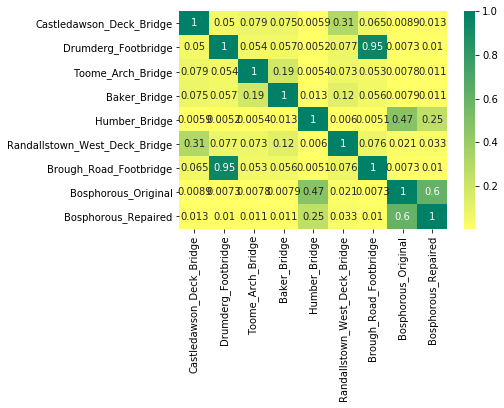

In [8]:
df = pd.DataFrame(data=similarity_matrix, index=bridge_list, columns=bridge_list)
ax = sns.heatmap(df, annot=True, cmap="summer_r")